<a href="https://colab.research.google.com/github/robertccruz13-ship-it/sds-510-robert-cruz/blob/main/module_6.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install networkx matplotlib pandas

import networkx as nx
import matplotlib.pyplot as plt
import pandas as pd

In [4]:
from google.colab import files
uploaded = files.upload()

Saving BASEBALL_1M.csv to BASEBALL_1M.csv


In [5]:
import pandas as pd

df = pd.read_csv ("BASEBALL_1M.csv")
df.head()



,Unnamed: 0,Victor_Conte,Jeremy_Giambi,Jason_Giambi,Gary_Sheffield,Bobby_Estalella,Benito_Santiago,Marvin_Bernard,Barry_Bonds,Armando_Rios,...,Kevin_Young,Tim_Laker,Hal_Morris,Mike_Lansing,Glenallen_Hill,Mike_Bell,Bart_Miadich,Jim_Parque,Phil_Hiatt,Denny_Neagle
0,Victor_Conte,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
1,Jeremy_Giambi,1,1,1,1,0,0,0,1,1,...,0,0,0,0,0,0,0,0,0,0
2,Jason_Giambi,1,1,2,2,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
3,Gary_Sheffield,1,1,2,2,1,1,1,2,2,...,0,0,0,0,0,0,0,0,0,0
4,Bobby_Estalella,0,0,1,1,1,1,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [7]:
df_adj = df.set_index('Unnamed: 0')
G = nx.from_pandas_adjacency(df_adj)

degree = nx.degree_centrality(G)
betweeness = nx.betweenness_centrality(G)
eigen = nx.eigenvector_centrality(G)

metrics = pd.DataFrame({
    "degree": degree,
    "betweeness": betweeness,
    "eigen": eigen
})

metrics.sort_values("betweeness", ascending=False).head(10)

,degree,betweeness,eigen
Jerry_HarrisonJr,0.647887,0.017304,1.508327e-01
Jason_Grimsley,0.154930,0.012072,1.309011e-07
Jose_Canseco,0.112676,0.004963,7.173794e-08
Gary_MatthewsJr,0.098592,0.000939,6.961661e-08
David_Bell,0.098592,0.000939,6.961661e-08
Gary_Sheffield,0.154930,0.000805,7.558018e-07
Barry_Bonds,0.154930,0.000805,7.558018e-07
Jason_Giambi,0.154930,0.000805,7.558018e-07
Armando_Rios,0.154930,0.000805,7.558018e-07
Marvin_Bernard,0.126761,0.000000,6.505652e-07


In [8]:
target_node = metrics ["betweeness"].idxmax()
target_node

'Jerry_HarrisonJr'

In [9]:
G_removed = G.copy()
G_removed.remove_node(target_node)

In [12]:
largest_cc_nodes = max(nx.connected_components(G_removed), key=len)
largest_cc_subgraph = G_removed.subgraph(largest_cc_nodes)

after = dict(
    components = nx.number_connected_components(G_removed),
    diameter = nx.diameter(largest_cc_subgraph),
    average_shortest_path = nx.average_shortest_path_length(largest_cc_subgraph)
)
after

{'components': 6, 'diameter': 1, 'average_shortest_path': 1.0}

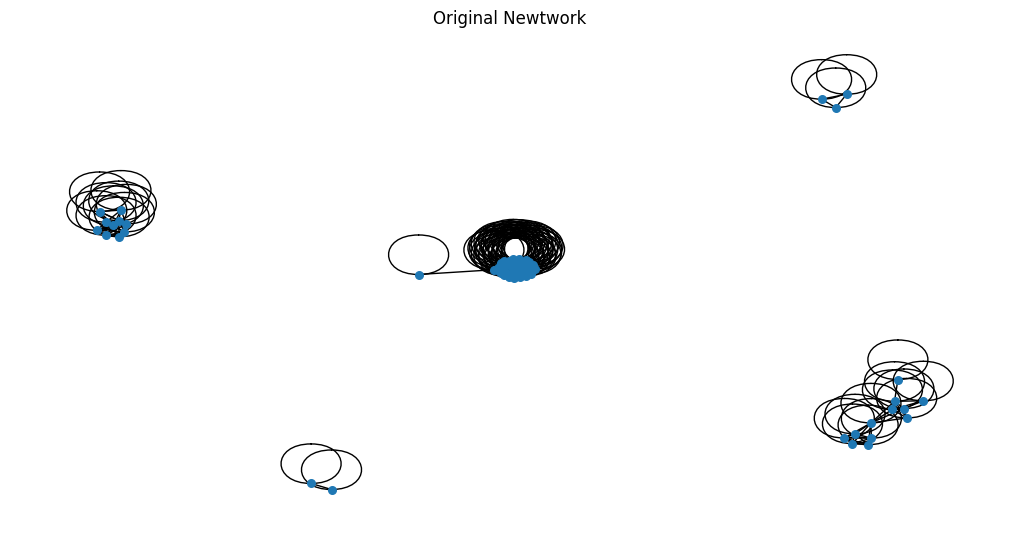

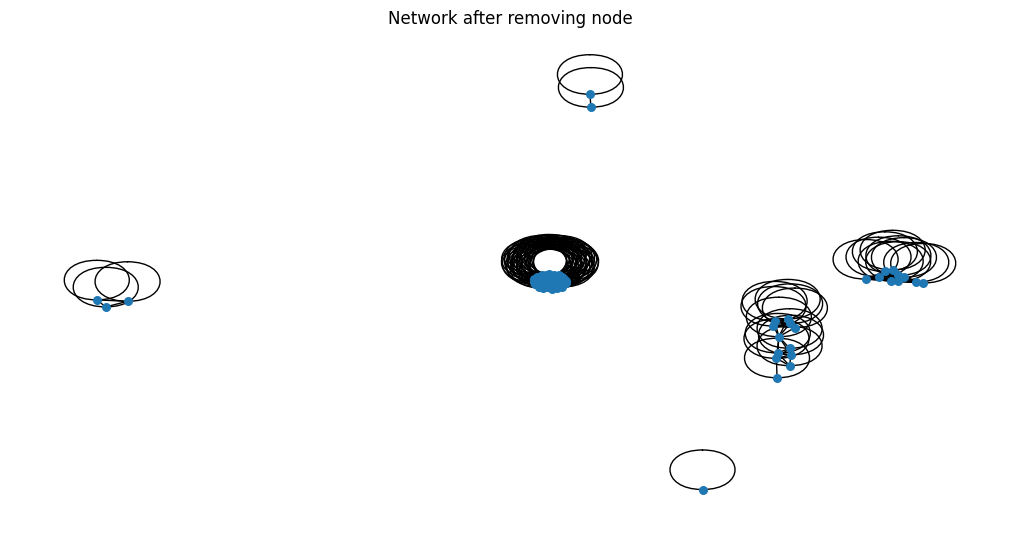

In [13]:
plt.figure(figsize=(10, 5))
nx.draw(G, node_size=30)
plt.title("Original Newtwork")
plt.show()

plt.figure(figsize=(10, 5))
nx.draw(G_removed, node_size=30)
plt.title("Network after removing node")
plt.show()